# Introduction

* Hello, our names are Cristian, Patrick, Shorter, and Vincent

## Project Objective 
- Perform analysis on trending Youtube videos and the channels that create them in order to craft a machine learning algorithm predicting a videos placement in Top 25 of Youtube's Top 200 trending list. 

- This project runs through the entire Data Science Pipeline and culminates with classification modeling techniques.

## Executive Summary


* Entertaiment videos are by far the most popular
* Non-Profit videos receive the most engagement
* Global trends stay fairly consistent, but their is some variance
* Release timing is an important factor when wanting to make the jump to becoming a Top 25 video

# Import Section

In [1]:
import pandas as pd
from explore import *
from importlib import reload
import model

import warnings
warnings.filterwarnings("ignore")

# 1) Acquire

Download this linked pickle file into your directory 
first if you have not already
https://drive.google.com/file/d/1twg97V0zm_OUcnyWqzYRs38iNuI-5Yc1/view?usp=share_link

In [2]:
#acquiring the data from a pre-prepared and pickled dataframe
df=pd.read_pickle('prepared.pkl')

# 2) Prepare

In [3]:
#preparing the dataframe 
df=prepare_df(df)
df = df.sort_values(by='rank').drop_duplicates(['video_id']).reset_index(drop=True)

In [4]:
#splitting up the data to train,val,test
train, validate, test = train_validate_test_split(df)

##  Wrangling Takeaways
* Using the Youtube API and Youtube Analytics API we pulled in base level statistics for videos and channels
* We planned this out using a API scraper and CRONtabs to automate the video scraping to occur every hour on the hour over a 3 day period.
* Videos pulled were all trending videos from 11 countries, videos pulled from each country were that country's respective top 200 trending videos.
* Format of some features from the API were a nuisance:
  * Example: `duration` being a string
  * Example: `categoryId` being a numerical value that had to be encoded to represent the category name.
  * Example: `trending_date` not being in the same format as `PublishedAt`
### Nulls/Missing Values
* Nulls found in `descriptions` were handled by filling with 'No Description"

### Feature Engineering (Highlights)
* Top 25 (TARGET): Has the video ever been ranked in the top 25
* Rank: Highest rank acheived by a video worldwide
* Engagement: The level of audience engagement
* Word Bank: Words in the tags and descriptions
* Age: How old was a video at its peak rank

---


# 3) Exploration

`What we did:`

- We explored the differences in category
- Differences in regions
- What effect views/likes more
- Do comments effect the amount of views a video would have
- Does freedom of words effect views

# Hypotheses:

`Hypotheses1:`Are disable comments optaining more views the none disable comments:

- `H0-`Disable comments optain more views then not disable 

- `Ha-`non disabled comments get more views then disable comments

`Hypotheses2:`Does comment value and views have a corralantioin together?

- `H0-`Comments and view have a high corralations

- `Ha-`Comments and views dont have high corraltions 

`Hypotheses3:`Does the category effect the amount of like receive from the video?

- `H0`- Category effect amount of likes

- `Ha`- Category doesnt effect amount of like received

`Hypotheses4:`What is the most frequent occuring bigrams per category 

`Hypotheses5:`Total count of words per category,Does category effect total amount of words??


`Hypotheses6:`Are some region more active then others??? for example likes/views

## Spotlight - `Disabled Comments`


- **Question:** Are disable comments optaining more views the none disable comments
 
- **Answer:** Yes disable comments do effect views by a decent amount 

### Takeaways:
    
- Non disable comments take up about 99 percent of the total comment

- Even tho disable comments take up alot more the gap on views isn't as great as we would've thought 


### 1. Are videos with disabled comments obtaining more views the none disable comments:

`H0-`Disable comments optain more views then not disable 

`Ha-`non disabled comments get more views then disable comments

In [5]:
#stats test anova:needed
comments_stats(train)

We reject the null hypothesis
We can say that we have confidence that comments_disabled is related to view_count


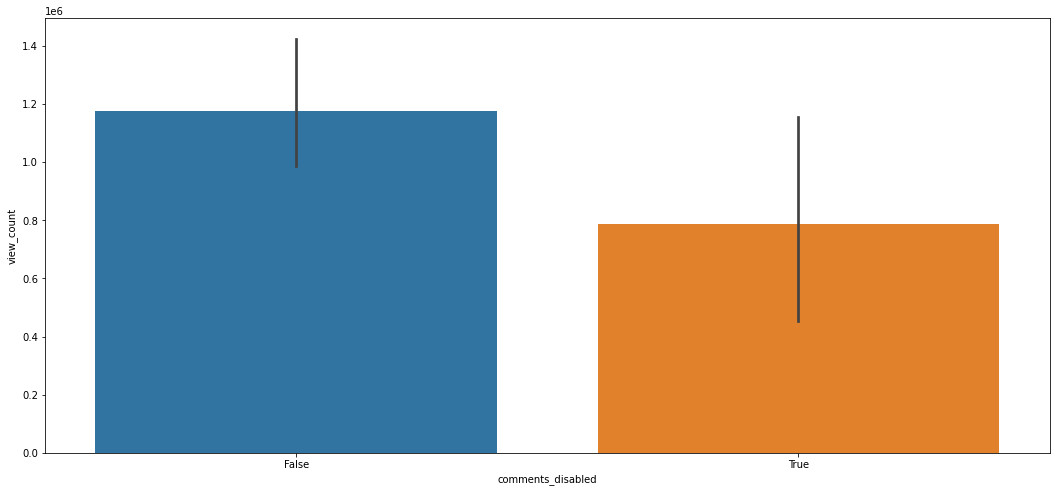

In [6]:
disable_comments2(train)

---
## Spotlight - `Comment value/engament`


- **Question:** Is there a correlation between comments and view count?
 
- **Answer:** Yes, there is a statistical correlation between comments and view counts? 


### Takeaways:
    
- Entertainment has the highest engament/comment count

- Look like most videos dont get past the 100k comment count but 2

- 25k seem to be the average comment count 

# 2. Does comment value and views have a corralantion together??

`H0-`Comments and view have a high corralation

`Ha-`Comments and views dont have high corraltion 

In [7]:
comments_stats2(train)

We reject the null hypothesis
We can say that we have confidence that comment_count is related to engagement


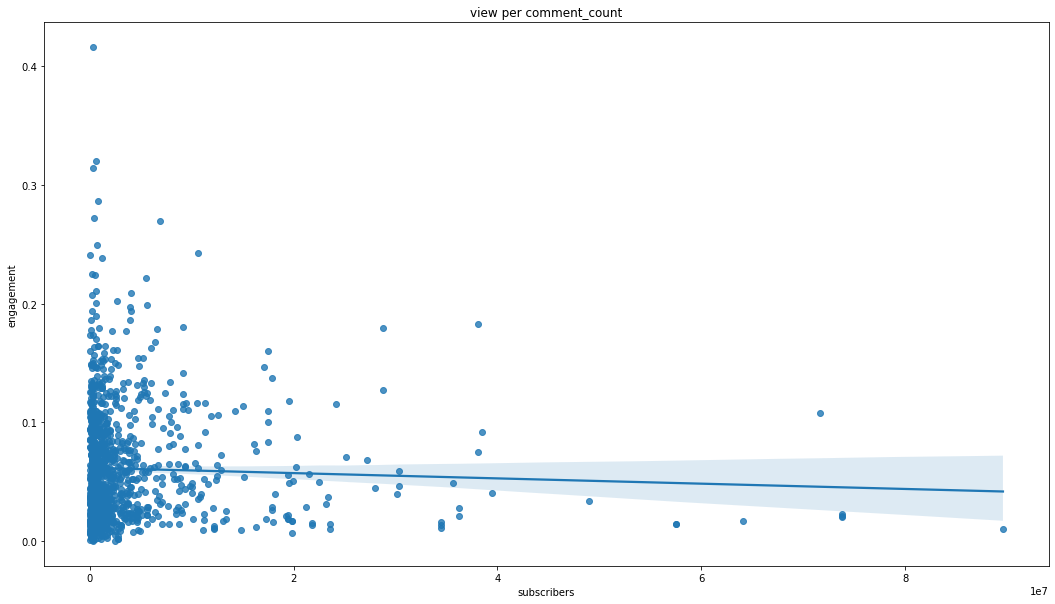

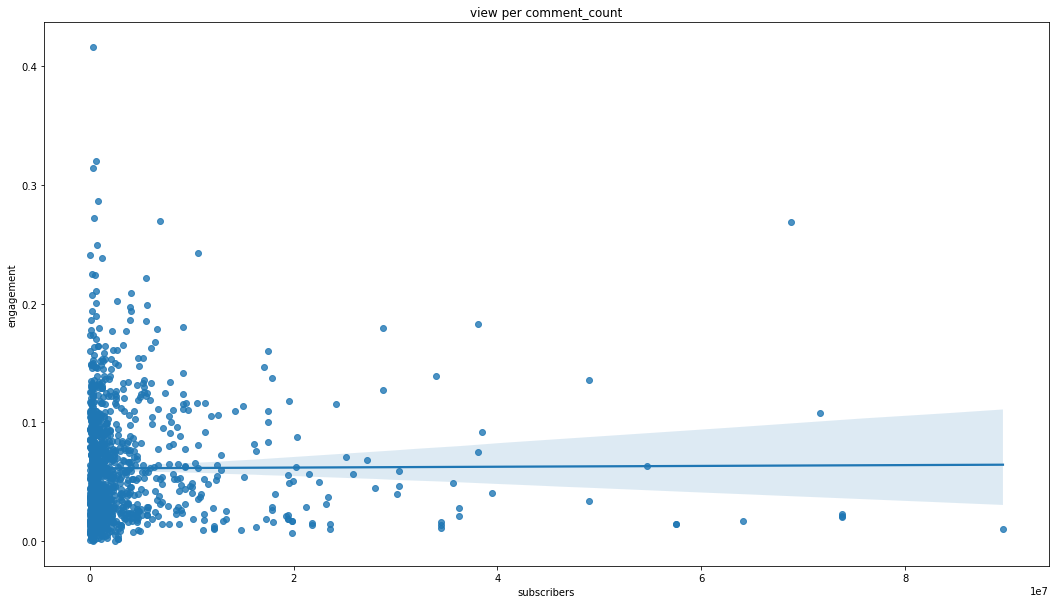

In [8]:
comments_views2(train)

---

## Spotlight - `Category`


- **Question:** Does the category effect the amount of like receive from the video? 
 
- **Answer:** short answer yes it does some of them are more active then others 
### Takeaways:
- Music and Entertainment are the highest liked

- Sport,new politics,and non profits are the lowest liked

# `Hypotheses3:`Does the category effect the amount of like receive from the video?

- `H0`- Category effect amount of likes

- `Ha`- Category doesnt effect amount of like received

- Answers for each category below second visual

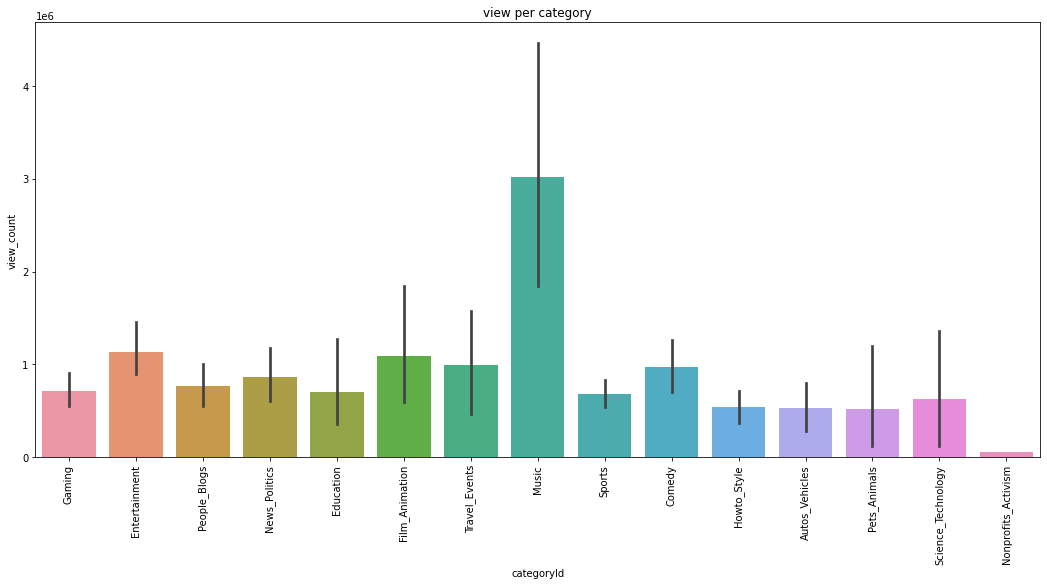

In [9]:
#comparing likes with categorys
category_views2(train)

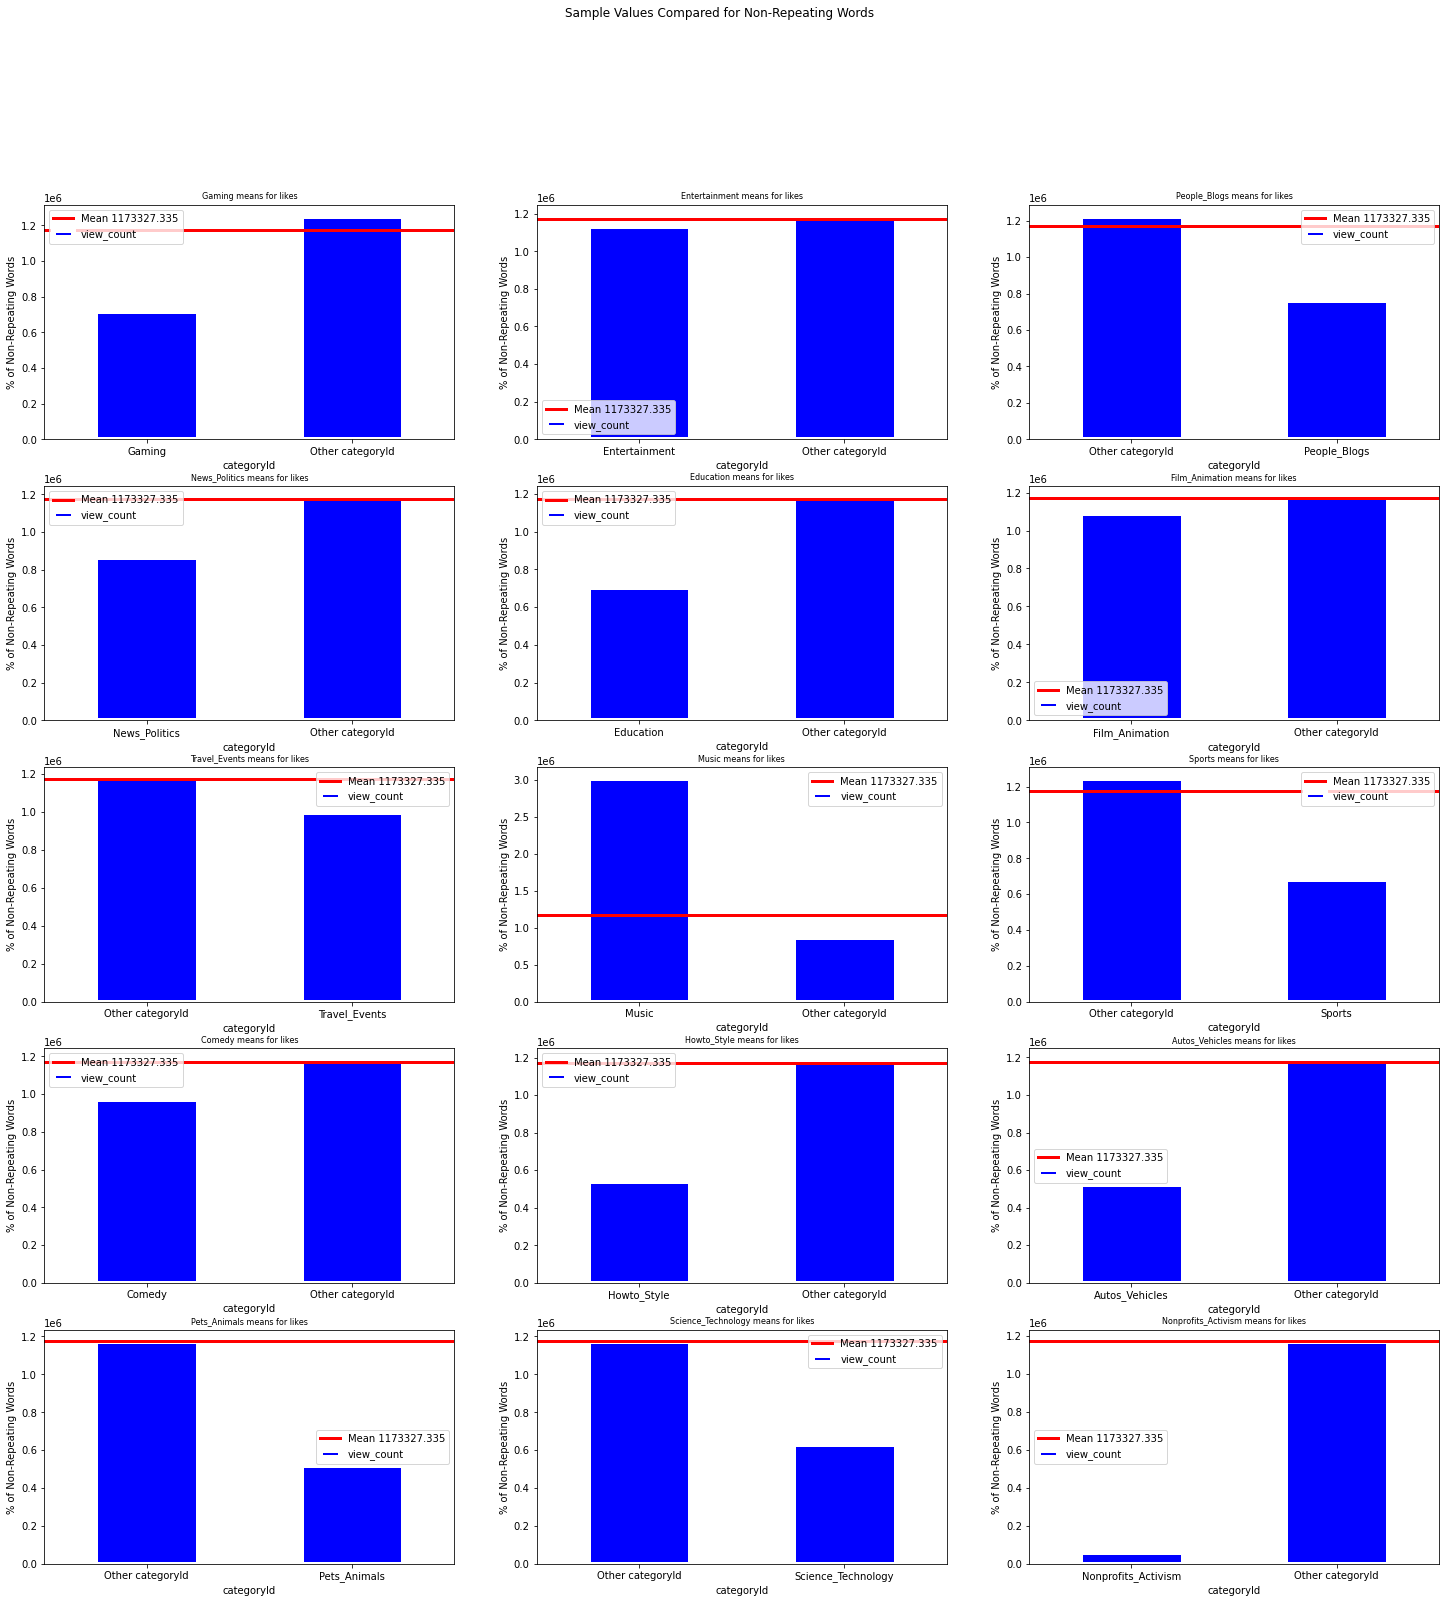

view_count <-target | categoryId <-population name | Gaming <-sample name
We reject the null Hypothesis ( G̶a̶m̶i̶n̶g̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶a̶t̶e̶g̶o̶r̶y̶I̶d̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶l̶i̶k̶e̶s̶ ) t=-4.89394, p=0.00000
----------
view_count <-target | categoryId <-population name | Entertainment <-sample name
We fail to reject the null hypothesis ( Entertainment as a sample has equal mean values to categoryId as a population regarding likes ) t=-0.26481, p=0.79134
----------
view_count <-target | categoryId <-population name | People_Blogs <-sample name
We reject the null Hypothesis ( P̶e̶o̶p̶l̶e̶_̶B̶l̶o̶g̶s̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶a̶t̶e̶g̶o̶r̶y̶I̶d̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶l̶i̶k̶e̶s̶ ) t=-3.48540, p=0.00067
----------
view_count <-target | categoryId <-population name | News_Politics <-sample name
We reject the null Hypo

In [10]:
#comparing likes with categorys
category_views3(train)

---
## Spotlight - `Bigrams`


- Question: What is the most frequent occuring bigrams per category 
 
- Answer: taylor swift for music/clash clan for gaming/top rank for sports 
### Takeaways:
    
- no really take aways from this beside taylor swift always being popular in music and clash of clan always being popular for years 

# `Hypotheses4:`What is the most frequent occuring bigrams per category 

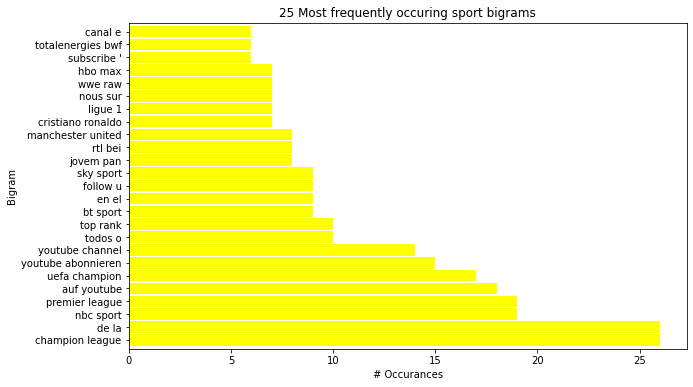

In [11]:
sport_bigrams(train)

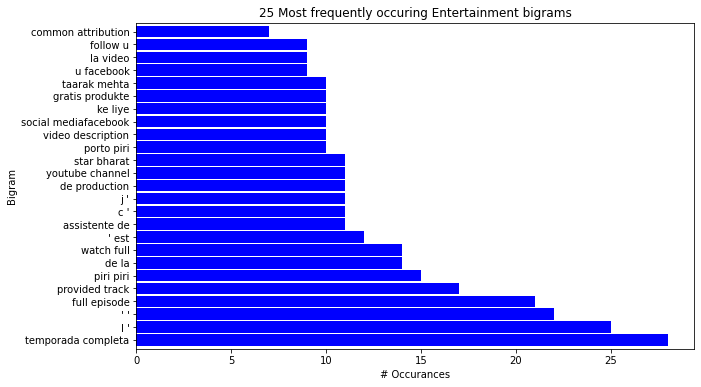

In [12]:
entertainment_bigrams(train)

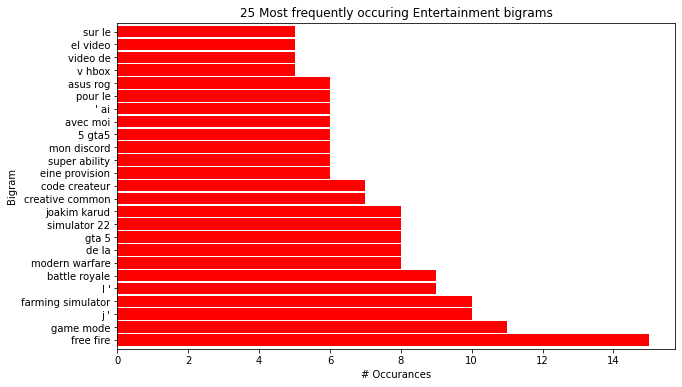

In [13]:
gaming_bigrams(train)

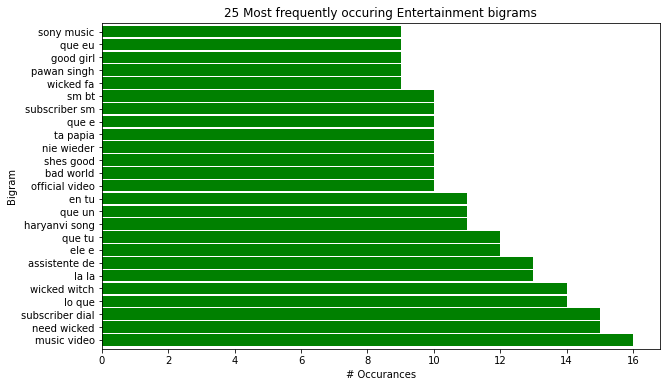

In [14]:
Music_bigrams(train)

---
## Spotlight - `Total count`


- **Question:** Total count of words per category,Does category effect total amount of words?? 
 
- **Answer:** Entertainment and music are the highest while the lowest are nonprofit and pet animals
### Takeaways:
    
- Entertainment has the highest word count while music is second

- Lowest word count is nonprofit but has the highest engament


# `Hypotheses5:`Total count of words per category,Does category effect total amount of words??

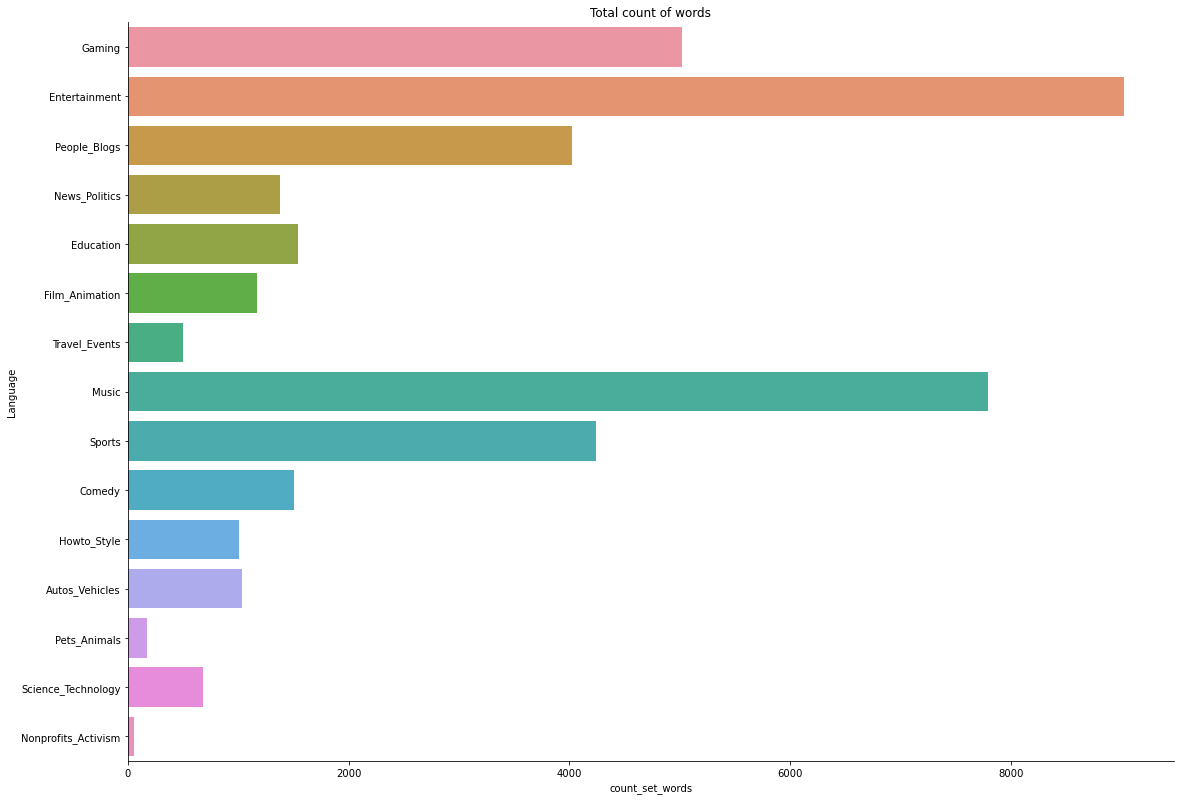

0     5023
1     9020
2     4021
3     1381
4     1544
5     1174
6      503
7     7791
8     4244
9     1509
10    1009
11    1039
12     178
13     684
14      57
Name: count_set_words, dtype: int64


In [15]:
#total word count graph
word_count(train)

---

## Spotlight - `Region activities`


- **Question:** Are some region more active then others??? for example likes/views
 
- **Answer:** Yes some regions have different trending views then others for example korea has more views on new policies then mexico
### Takeaways:
- All videos went viral on nov1,2022 
- Most video went viral after 2 days
- One video went viral on Oct3,2022

# `Hypotheses6:`Are some regions more active then others??? for example likes/views

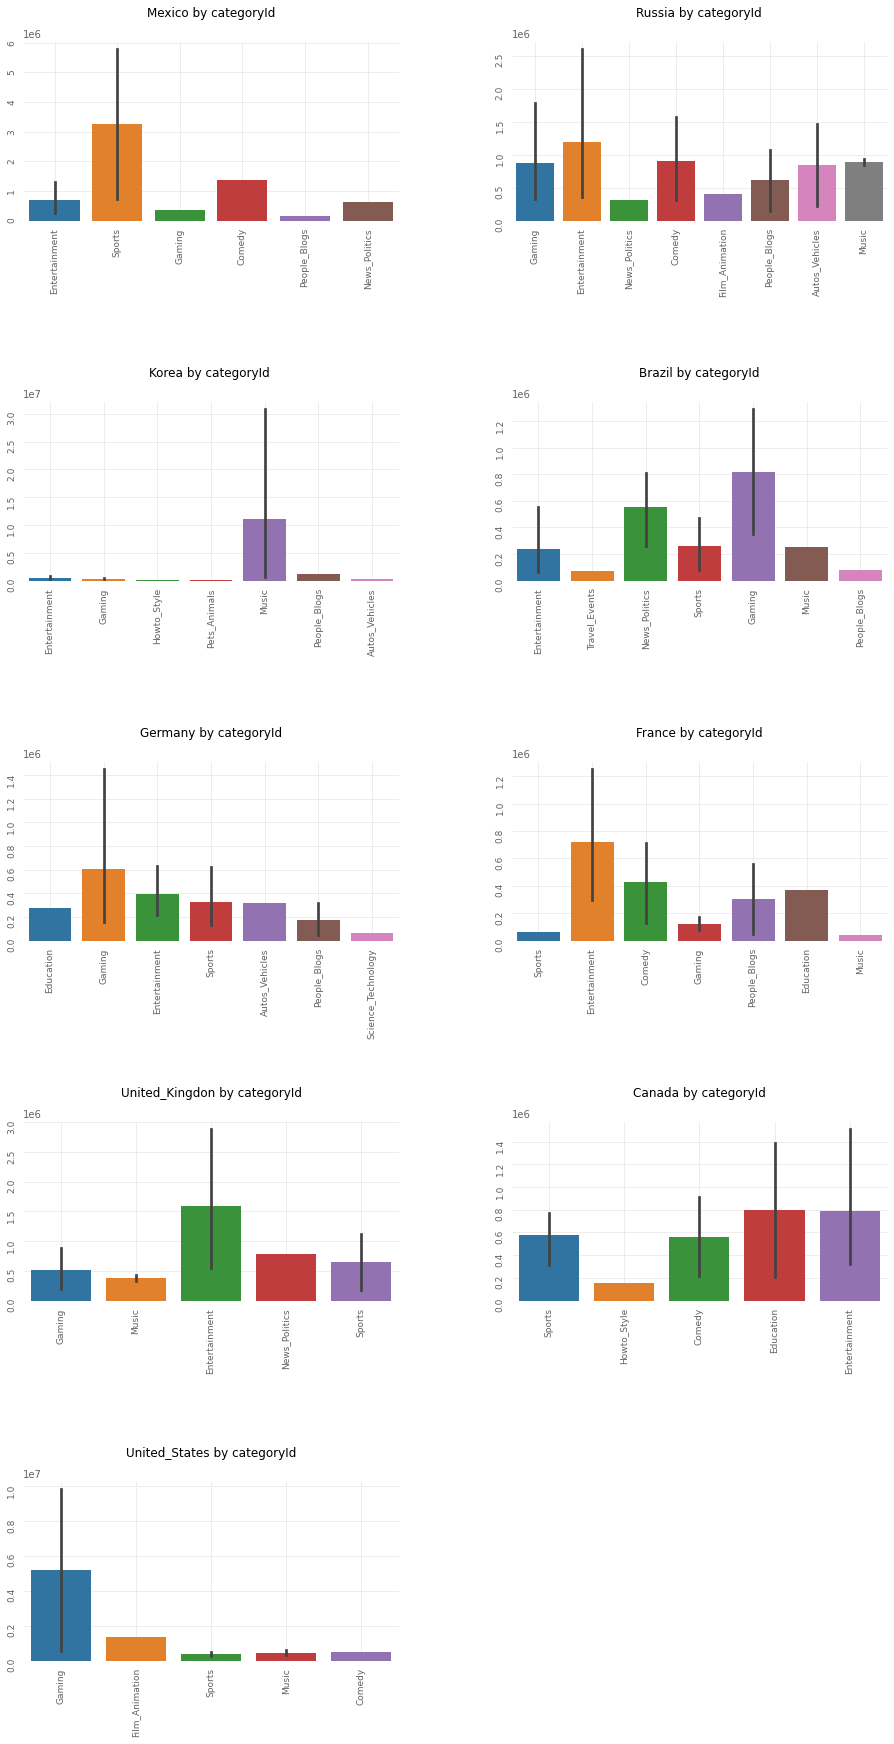

In [16]:
#view count compared by region/category 
Region_categories(train)

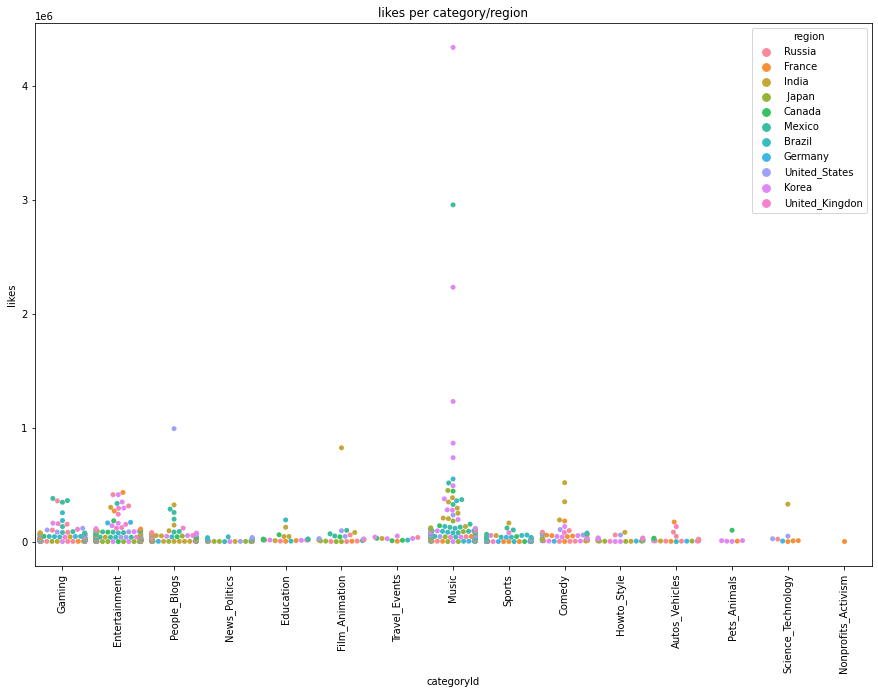

In [17]:
#likes compared by region
region_category2(train)

# Exploration Summary:
- Entertainment might have been the highest overall but doesnt mean it was liked/or viewed the most. Just means most videos are categories as entertainment
- Music/Entertainment have the highest words count but it could be because they both take up at least 15 percent and above of the whole dataframe
- Region effect on trending video alot because in some country music isnt the highest or entertainment 
- Having the comments enabled doesnt really effect the like/views to high so i think it doesnt matter if the video is bad or good as longest it gets views or some likes.
---

# Modeling
After analyzing the Top 200 trending Youtube videos, Exploration phase identified arrays of possible drivers of Top 25 trending Youtube videos. In this section, we will create a machine learning algorithm model that better and accurately predicts Top 25 trending Youtube videos and to use our takeaways and recommendations with an eye towards enabling smaller creators to produce in the mode of the top 25.

Top_25 is our target variable

We will use our training data to train/fit to our model and then tune the model on our validate data.

We will pick our best model on accuracy.

Four supervised machine learning classifications models were created in this project:

 - Decision Tree
 - Randon Forest
 - K-Nearest Neighbor
 - Logistic Regression 

## Split Data
 - Split data into 3 samples of train (60%), validate(20%) and test(20%)
 - Our target variable is Top_25

In [18]:
#train = model.final_drop(train)
#validate = model.final_drop(validate)
#test = model.final_drop(test)

In [19]:
#train_scaled, validate_scaled, test_scaled = model.scale_data(train, validate, test, features_to_scale)
#X_train, y_train, X_validate, y_validate, X_test, y_test = model.getting_(train_scaled,validate_scaled,test_scaled)
#model.run__on_test(X_train, y_train, X_test, y_test)

In [20]:
dummy_df = pd.get_dummies(df[['categoryId','region']], drop_first=True)

In [21]:
df = pd.concat([df, dummy_df], axis=1)

In [22]:
df = df.drop(columns=['categoryId','video_id','title','publishedAt','region','trending_date','tags','channelTitle',
                'thumbnail_link','comments_disabled','ratings_disabled','ratings_disabled',
                'ratings_disabled','description','captions','channel_age', 'rank',
                'word_bank','cleaned_tags','cleaned_desc','title_in_description','title_in_tags','clean', 'stemmed','lemmatized'],\
                axis=1)

In [23]:
train, validate, test = model.my_train_test_split(df, 'top_25')

In [24]:
train.shape,validate.shape,test.shape

((1211, 41), (404, 41), (404, 41))

## Scale Data

In [25]:
#selected features to scale into train, validate & test
features_to_scale = ['view_count', 'likes', 'comment_count', 'duration',\
            'num_of_tags', 'pct_tags_in_description',\
            'title_lengths','desc_lengths','tags_length',\
            'content_rate', 'views_per_sub',\
            'subscribers','video_count','age','engagement','sponsored']

- features selected were primary means of differientation among top 25 type videos and those without the designation

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
train_scaled, validate_scaled, test_scaled = model.scale_data(train, validate, test, features_to_scale)

## Feature Selection
- Select best
- Uses statistical tests to determine each feature's usefulness in predicting the target variable.
- Ranks the features based of highest correlation to engagement, region and category.

In [28]:
#X will be features
#y will be our target variable
#these features have high correlation to top_25 videos
X_train, y_train, X_validate, y_validate, X_test, y_test = model.getting_(train_scaled,validate_scaled,test_scaled)

## Baseline Prediction and Accuracy
- Baseline prediction is a benchmark. It predicts the most prevelant class in the train data. We compare our model and want it to be better than the baseline prediction.

In [29]:
# look at values of target variable top_25
# baseline prediction: the most prevalent class in training dataset(the mode)
y_train.value_counts()

0    987
1    224
Name: top_25, dtype: int64

In [30]:
#Formulate baseline accuracy
baseline_accuracy = (y_train == 0).mean()
print('Top_25 videos baseline accuracy is:', baseline_accuracy)

Top_25 videos baseline accuracy is: 0.815028901734104


## Top Models


We will pick our best model on accuracy.

Four supervised machine learning classifications models were created in this project:

 - Decision Tree
 - Randon Forest
 - K-Nearest Neighbor
 - Logistic Regression 



|    | Model    |   Accuracy(Score) | Type                     | Parameters   |
|---:|:---------|------------------:|:-------------------------|:-------------|
|    | DTC      |	0.87871         |Decision Tree Classifier  |Depth: 8       
|    | RF       |   0.88613         |Random Forest             |Min Leaf:15
|    | KNN      |	0.81188         |KNeighbors Classifier     |Depth: 2       
|    | LR       |	0.82178         |Logistic Regression.      |
      
---





## Test Model

In [31]:
model.run__on_test(X_train, y_train, X_test, y_test)

0.889

---
* Top Model Performance on Test set  

|    | Model    |   Accuracy(Score) | Type                     | Parameters   |
|---:|:---------|------------------:|:-------------------------|:-------------|
|  0 | Baseline |          0.81     | Basic Baseline           | n/a          |
|  1 | RF       |          0.88     | Random Forest |          |

---

## Test Takeaways

- Random Forest model performed best on validate data with 88% accuracy, so we will use it on test data.

## Modeling Takeaways

- Random Forest and Decision Tree models had roughly almost the same accuracy for train and validate sets.
- KNeighbors Classifier and Logistic Regression model performed the worst on out-of-sample data.
- The best performing model is Random Forest Classifier.
- However, from the above model analysis we can see that the highest accuracy is achieved by Random Forest. It performs better than baseline by about 7%.

- While this is an improvement there is still room for improvement in future iterations

# Conclusion
## Summary of Key Findings
* Entertaiment videos are by far the most popular
* Non-Profit videos receive the most engagement
* Global trends stay fairly consistent, but their is some variance
* Release timing is an important factor when wanting to make the jump to becoming a Top 25 video
---
## Suggestions and Next Steps
* Recommendations: Focus content on a mix of Non-Profit and Entertainment content released early in the day to capture widest audience
* Future Talk: With more time we would incorporate more data featuring channel analytics because who is posting is just as important as what is being posted
* Next Steps: Work to capture more channel information. Provide deeper insights in regards to content release schedule and global appeal

